In [31]:

import numpy as np
import xarray as xr
from datetime import datetime, timedelta
from netCDF4 import Dataset
import pandas as pd

size_grid="8th"
# Import reference grid 
map_xth = "/Odyssey/private/t22picar/data/ssh_L4/SSH_L4_CMEMS_2010-01-01-2024-01-01.nc"
start_date = "2010-01-01"
end_date = "2010-01-02"
map_xth = xr.open_dataset(map_xth).sel(time=slice(start_date,end_date))
nt, ny, nx = map_xth.dims["time"], map_xth.dims["latitude"], map_xth.dims["longitude"]

lat_ref = map_xth.latitude.values
lon_ref = map_xth.longitude.values

# Import data to interp
# TO EDIT
file_map = "/Odyssey/private/t22picar/data/era5/"
str_save_file = f"era5_{start_date}_{end_date}_{size_grid}.nc"

# save data 
output_file=file_map+str_save_file

with Dataset(output_file, "w", format="NETCDF4") as nc:
    # Créer les dimensions
    nc.createDimension("time", nt)
    nc.createDimension("lat", ny)
    nc.createDimension("lon", nx)

    # Créer les variables
    times = nc.createVariable("time", 'datetime64[ns]', ("time",))
    times.units = map_xth.time.unit_long
    times.calendar = "gregorian"
    lat = nc.createVariable("lat", "f4", ("lat",))
    lon = nc.createVariable("lon", "f4", ("lon",))
    u10 = nc.createVariable("u10", "f4", ("time", "lat", "lon"))
    v10 = nc.createVariable("v10", "f4", ("time", "lat", "lon"))

    # Écrire les coordonnées fixes
    lat[:] = map_xth["latitude"].values
    lon[:] = map_xth["longitude"].values
    times[:] = map_xth["time"].values.astype('datetime64[ns]')

    print(output_file)

    # Boucle d’écriture incrémentale
    for i, t in enumerate(map_xth.time):
        year= pd.to_datetime(t.values).year
        file_era = f"era5_{year}.grib" # Actually not glorys 
        print("Opening era file...")
        subset = xr.open_dataset(file_map+file_era, engine="cfgrib").sel(time=pd.to_datetime(t.values).strftime('%Y-%m-%d'))
        subset['longitude'] = xr.where(subset['longitude'] > 180, subset['longitude'] - 360, subset['longitude'])
        subset = subset.resample(valid_time='1D').mean()
        subset = subset.interp({"latitude":lat_ref, "longitude":lon_ref}, method="linear")
        u10[i, :, :] = subset["u10"].values
        v10[i, :, :] = subset["u10"].values


/tmp/ipykernel_1366960/457062678.py:13: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  nt, ny, nx = map_xth.dims["time"], map_xth.dims["latitude"], map_xth.dims["longitude"]


TypeError: Illegal primitive data type, must be one of dict_keys(['S1', 'i1', 'u1', 'i2', 'u2', 'i4', 'u4', 'i8', 'u8', 'f4', 'f8']), got datetime64[ns] (variable 'time', group '/')

In [29]:
map_xth["time"].values.astype("datetime64[ns]")

array(['2010-01-01T00:00:00.000000000', '2010-01-02T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [28]:
# Import reference grid 
map_8th = "/Odyssey/private/t22picar/data/era5/era5_2010-01-01_2010-01-02_8th.nc"
map_8th = xr.open_dataset(map_8th)
map_8th


<xarray.Dataset> Size: 66MB
Dimensions:  (time: 2, lat: 1440, lon: 2880)
Coordinates:
  * time     (time) float64 16B 1.262e+18 1.262e+18
  * lat      (lat) float32 6kB -89.94 -89.81 -89.69 -89.56 ... 89.69 89.81 89.94
  * lon      (lon) float32 12kB -179.9 -179.8 -179.7 ... 179.7 179.8 179.9
Data variables:
    u10      (time, lat, lon) float32 33MB ...
    v10      (time, lat, lon) float32 33MB ...

In [21]:
map_8th.time

<xarray.DataArray 'time' (time: 2)> Size: 16B
array([1.262304e+18, 1.262390e+18])
Coordinates:
  * time     (time) float64 16B 1.262e+18 1.262e+18
Attributes:
    units:    Days Since 1950-01-01

In [46]:
ls /Odyssey/private/t22picar/data/era5/

69d597b8c67e871c3668986835ce3e68.grib.5b7b6.idx*
era5_2010-01-01_2010-01-04_8th.nc
era5_2010.grib
era5_2010.grib.5b7b6.idx*
era5_2011.grib
era5_2011.grib.5b7b6.idx*
era5_2012.grib
era5_2012.grib.5b7b6.idx*
era5_2013.grib
era5_2013.grib.5b7b6.idx*
era5_2014.grib
era5_2014.grib.5b7b6.idx*
era5_2015.grib
era5_2015.grib.5b7b6.idx*
era5_2016.grib
era5_2016.grib.5b7b6.idx*
era5_2017.grib
era5_2017.grib.5b7b6.idx*
era5_2018.grib
era5_2018.grib.5b7b6.idx*
era5_2019.grib
era5_2019.grib.5b7b6.idx*
era5_dailymean_4th_2010-01-01_2020-01-01.nc
era5_.nc


In [48]:
# Import reference grid 
map_8th = "/Odyssey/private/t22picar/data/era5/era5_2010-01-01_2010-01-04_8th.nc"
map_8th = xr.open_dataset(map_8th)

# Import reference grid 
map_4th = "/Odyssey/private/t22picar/data/era5/era5_dailymean_4th_2010-01-01_2020-01-01.nc"
map_4th = xr.open_dataset(map_4th)

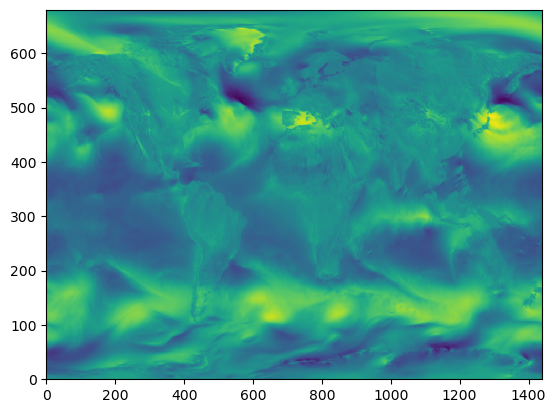

In [49]:
import matplotlib.pyplot as plt 
plt.pcolormesh(map_4th.u10[0])

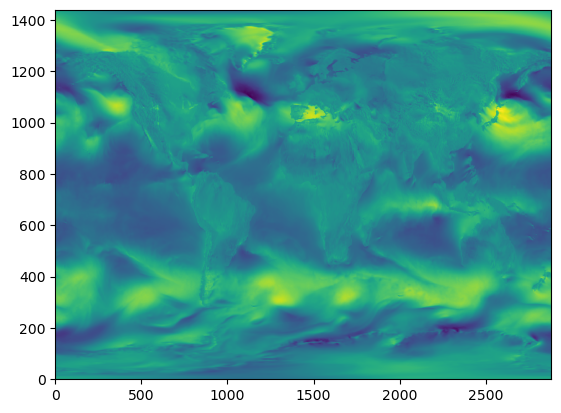

In [45]:
import matplotlib.pyplot as plt 
plt.pcolormesh(map_8th.u10[0])


In [ ]:
# Import data to interp

file_map = "/Odyssey/private/t22picar/data/ssh_L4/SSH_L4_CMEMS_2019.nc"
map = xr.open_dataset(file_map).sel(time="2010-01-01")

map = map.rename({"longitude" : "lon"})
map = map.rename({"latitude" : "lat"})
map = map.rename({"adt" : "zos"})
#map

map = map.interp({"lat":lat_ref, "lon":lon_ref}, method="linear")

# Get the list of variable names
variable_names = list(map.variables.keys())
variable_names.remove("time")

for var in variable_names:
    map[var] = map[var].astype(np.float32)

# save data 
save_file=file_map[:-3]+"_4th"+".nc"
# Sauvegarder le DataArray en fichier NetCDF
map.to_netcdf(save_file)


<xarray.Dataset> Size: 33MB
Dimensions:  (lat: 1440, lon: 2880)
Coordinates:
  * lat      (lat) float32 6kB -89.94 -89.81 -89.69 -89.56 ... 89.69 89.81 89.94
  * lon      (lon) float32 12kB -179.9 -179.8 -179.7 ... 179.7 179.8 179.9
    time     datetime64[ns] 8B 2010-01-01
Data variables:
    zos      (lat, lon) float64 33MB ...
Attributes:
    history:                   2024-10-23 12:55:06Z: Creation
    comment:                   Sea Surface Height measured by Altimetry and d...
    contact:                   servicedesk.cmems@mercator-ocean.eu
    title:                     DT merged all satellites Global Ocean Gridded ...
    institution:               CLS, CNES
    references:                http://marine.copernicus.eu
    Conventions:               CF-1.6
    source:                    Altimetry measurements
    copernicusmarine_version:  2.0.1

In [4]:
map = map.interp({"lat":lat_ref, "lon":lon_ref}, method="linear")

In [6]:
map.lon

<xarray.DataArray 'lon' (lon: 1440)> Size: 12kB
array([-180.      , -179.749884, -179.499768, ...,  179.41644 ,  179.666556,
        179.916672])
Coordinates:
    time     datetime64[ns] 8B 2010-01-01
  * lon      (lon) float64 12kB -180.0 -179.7 -179.5 ... 179.4 179.7 179.9
Attributes:
    units:          degrees_east
    long_name:      Longitude
    standard_name:  longitude
    axis:           X

In [ ]:
# save data 
save_file=file_map[:-3]+"_4th"+".nc"
# Sauvegarder le DataArray en fichier NetCDF
map.to_netcdf(save_file)